# Geometric Brownian Motion (GBM) and Arithmetic Brownian Motion (ABM) Simulation

This code simulates paths for Geometric Brownian Motion (GBM) and Arithmetic Brownian Motion (ABM), which are commonly used in financial modeling, particularly for stock price movements.

## Theory

### Arithmetic Brownian Motion (ABM)

ABM, also known as a Wiener process, is defined by the following stochastic differential equation:

$dX_t = \mu dt + \sigma dW_t$

where:
- $X_t$ is the value of the process at time $t$
- $\mu$ is the drift (average rate of change)
- $\sigma$ is the volatility (standard deviation of the process)
- $W_t$ is a Wiener process (standard Brownian motion)

### Geometric Brownian Motion (GBM)

GBM is derived from ABM and is often used to model stock prices. It's defined by:

$dS_t = \mu S_t dt + \sigma S_t dW_t$

where $S_t$ is the stock price at time $t$.

The solution to this equation is:

$S_t = S_0 \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right)$

In the code, we use the risk-free rate $r$ instead of $\mu$ for risk-neutral pricing.

## Code Explanation

The code consists of two main functions:

1. `GeneratePathsGBMABM`: Generates paths for both GBM and ABM
2. `mainCalculation`: Sets parameters and plots the results

### GeneratePathsGBMABM Function


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    #np.random.seed(1)
    Z=np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps+1])
    X=np.zeros([NoOfPaths,NoOfSteps+1])
    S=np.zeros([NoOfPaths,NoOfSteps+1])
    time=np.zeros([NoOfSteps+1])
    X[:,0] = np.log(S_0)


    dt=T/float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths>1:
            Z[:,i]=(Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])#normalised
        X[:,i+1]=X[:,i]+(r-0.5*sigma**2)*dt+sigma*np.power(dt,0.5)*Z[:,i]
        time[i+1]=time[i]+dt
    S=np.exp(X)
    paths={"time":time,"X":X,"S":S}
    return paths
        
    

This function does the following:

1. Sets a random seed for reproducibility
2. Generates random normal variables for the Brownian motion
3. Initializes arrays for the ABM (X) and GBM (S) paths
4. Calculates the ABM paths using the formula:
   $X_{t+dt} = X_t + (r - \frac{\sigma^2}{2})dt + \sigma \sqrt{dt} Z_t$
5. Calculates the GBM paths by taking the exponential of ABM:
   $S_t = \exp(X_t)$

### mainCalculation Function

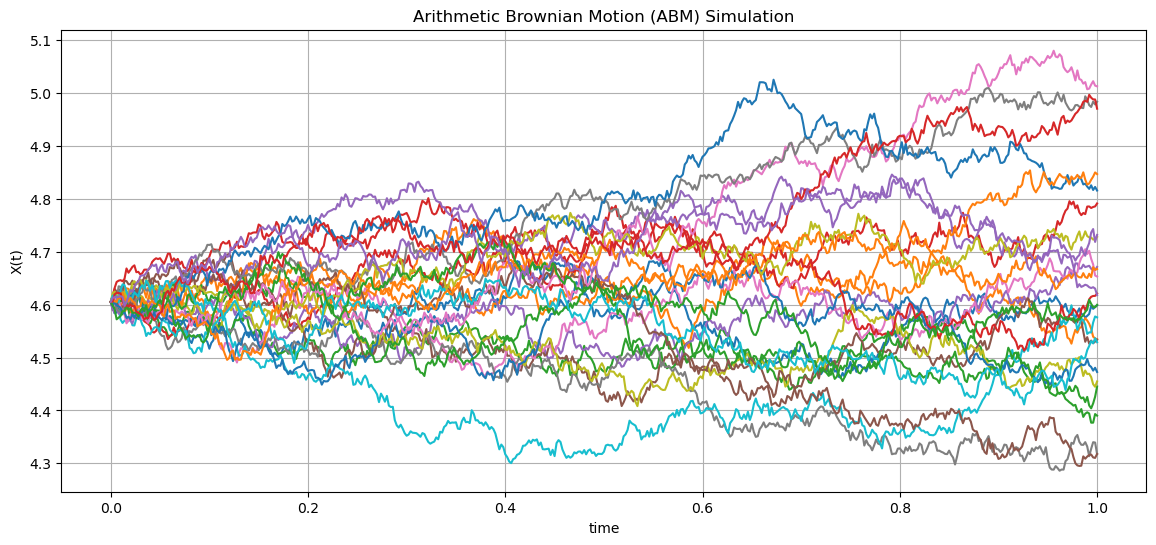

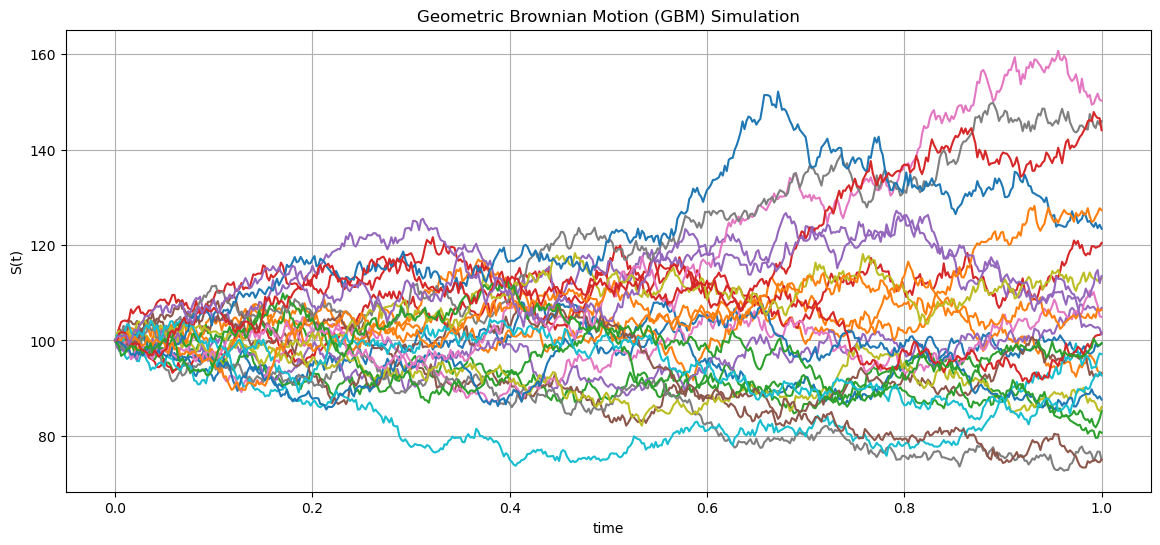

In [3]:
def mainCalculation():
    NoOfPaths=25
    NoOfSteps=500
    T=1
    r=0.05
    sigma=0.2
    S_0=100
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid=Paths["time"]
    X=Paths["X"]
    S=Paths["S"]

    plt.figure(1,figsize=(14,6))
    plt.title('Arithmetic Brownian Motion (ABM) Simulation')
    plt.plot(timeGrid,X.T)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

    plt.figure(2,figsize=(14,6)) 
    plt.title('Geometric Brownian Motion (GBM) Simulation')
    plt.plot(timeGrid,S.T)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
mainCalculation()


This function:

1. Sets the parameters for the simulation
2. Calls `GeneratePathsGBMABM` to generate the paths
3. Plots the results for both ABM and GBM

## Parameters

- `NoOfPaths`: Number of simulated paths
- `NoOfSteps`: Number of time steps in each path
- `T`: Total time period
- `r`: Risk-free interest rate
- `sigma`: Volatility
- `S_0`: Initial stock price

## Visualization

The code generates two plots:

1. ABM paths (X(t))
2. GBM paths (S(t))

These plots show multiple simulated paths for the processes over time.

## Running the Simulation

To run the simulation, simply call the `mainCalculation()` function. This will generate and display the plots for both ABM and GBM paths.